# ✈️ Aviation Crash Analysis (1908–2023)  
## 📘 Project Overview

This project investigates over a century of airplane crash data, covering incidents from 1908 to 2023. By analyzing trends in aviation accidents, locations, fatalities, operators, aircraft types, and text-based summaries, the goal is to derive meaningful insights about aviation safety, common causes, and operational risks.

The analysis blends structured data (like dates, fatalities, operators) with unstructured textual summaries, using Python-based EDA and NLP techniques. The results offer a broad and deep view of aviation history, highlighting both progress and persistent challenges.

---

## 🧪 Methodology

- **Dataset**: [Airplane Crashes and Fatalities (up to 2023)](https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023)
- **Tools Used**:  
  `Pandas`, `Matplotlib`, `Seaborn`, `WordCloud`, `NLP (Regex & Counter)`, `Datetime`, `Plotly`
- **Feature Engineering**:
  - Extracted year, month, and hour from crash dates.
  - Created flags like `Is_Fatal`, `Cause_Known`, and `Crash_Location_Type`.
  - Parsed locations to approximate countries and regions.
  - Mined summaries for frequent keywords and cause mentions.

The workflow combined exploratory data analysis with visual storytelling and keyword-driven insights to cover historical, technical, and operational dimensions.

---

## 📌 Key Findings Summary

### 📈 Trends Over Time
- Crashes have **declined significantly** since the 1980s.
- The **deadliest decades** were the 1970s and 1980s, driven by rapid air travel expansion without equal safety measures.
- **Post-2000** crash reports show greater consistency and fewer vague causes.

### 🧮 Fatality Patterns
- Several **crashes resulted in total fatalities**, often due to mechanical failure, explosions, or military incidents.
- The **average fatality rate per crash** is high during global conflicts and war eras.
- Most crashes **involved fatalities**—only a minority were non-fatal.

### 🛩️ Aircraft & Operator Insights
- Certain aircraft types (especially older models) had **notably higher crash and fatality rates**.
- A small group of operators was involved in a **disproportionate number of fatal crashes**, especially in earlier decades.

### 🌍 Location-Based Observations
- **Russia, Indonesia, and Brazil** had the most crashes since 2000.
- Most crashes occurred **on land**, near urban areas or terrain-challenging regions.
- **Moscow, Tehran, and Goma** appeared among the top crash regions.

### 🔤 Summary-Based Cause Analysis
- Keywords like **“engine failure,” “fire,” “shot down,” “storm,” and “collision”** recur frequently in summaries.
- Over **94% of summaries post-2000** provide a known or inferred cause—compared to ~5% that remain vague.
- Language during **WWI and WWII** reflects military aviation focus (e.g., "shot down", "enemy", "mission").

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\Working on My Skill Set\Data Science\Portfolio Projects\Airplane Crashes and Fatalities upto 2023\notebooks\eda_workbench\feature_engineered_crashes.csv")


## ✈️ The Heart of the Crash Analysis

📈 1. What are the most common crash locations (top 10)?

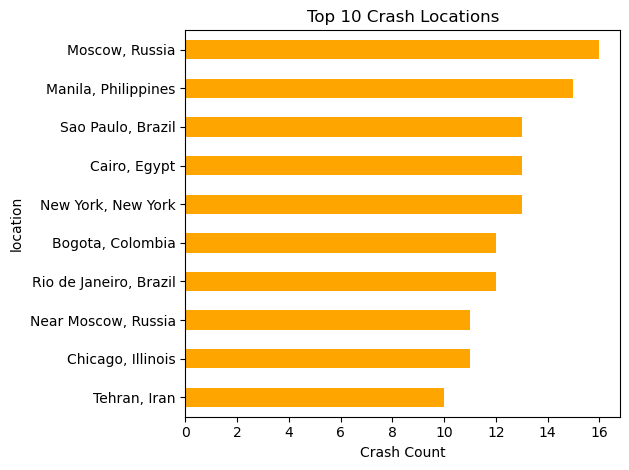

In [4]:
df["location"].value_counts().head(10)

df["location"].value_counts().head(10).plot(kind="barh", color="orange", title="Top 10 Crash Locations")
plt.xlabel("Crash Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

These aren’t necessarily the most dangerous — they could reflect **more air traffic**, **better reporting**, or **historic conflict zones**.

2. Is there any decade with notably higher crash rates?

Total number of crashes per decade:
Decade
1900      1
1910     30
1920    179
1930    355
1940    568
1950    646
1960    634
1970    611
1980    552
1990    630
2000    506
2010    233
2020     27
Name: count, dtype: int64


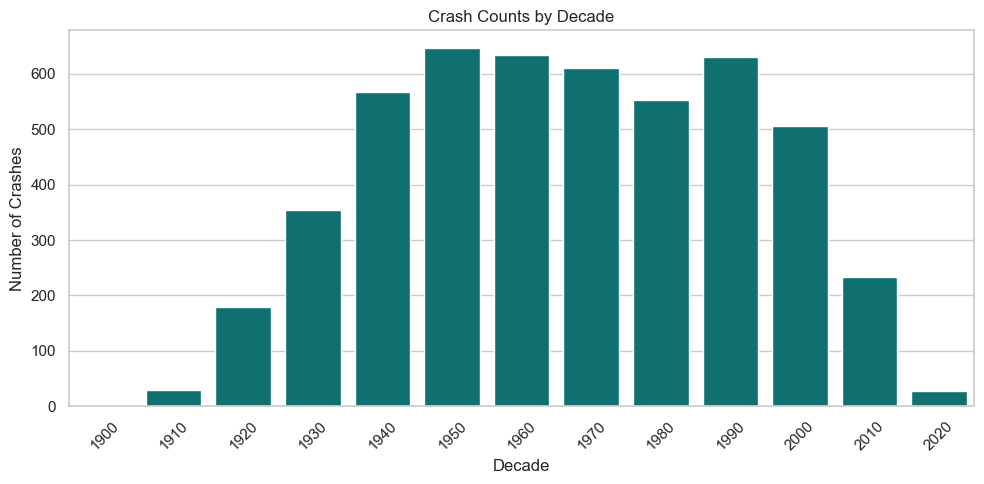

In [6]:
if "Decade" not in df.columns:
    df["Decade"] = (df["Year"] // 10) * 10

# Count crashes per decade
crashes_per_decade = df["Decade"].value_counts().sort_index()

# Show the table
print("Total number of crashes per decade:")
print(crashes_per_decade)

# Plot crashes per decade
plt.figure(figsize=(10, 5))
sns.barplot(x=crashes_per_decade.index, y=crashes_per_decade.values, color='teal')
plt.title("Crash Counts by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Crashes peaked in the 1950s–1970s, with over 600 crashes per decade. The 1990s also saw a surprisingly high number, possibly due to better reporting worldwide. Post-2010, the crash count drops dramatically. This aligns with advancements in aviation tech, regulations, and safety protocols — but again, data sparsity could also play a part.

3. How do total fatalities vary by year or decade?

Sample fatalities by year:
Year
1908      1.0
1912      5.0
1913     45.0
1915     40.0
1916    108.0
Name: fatalities, dtype: float64


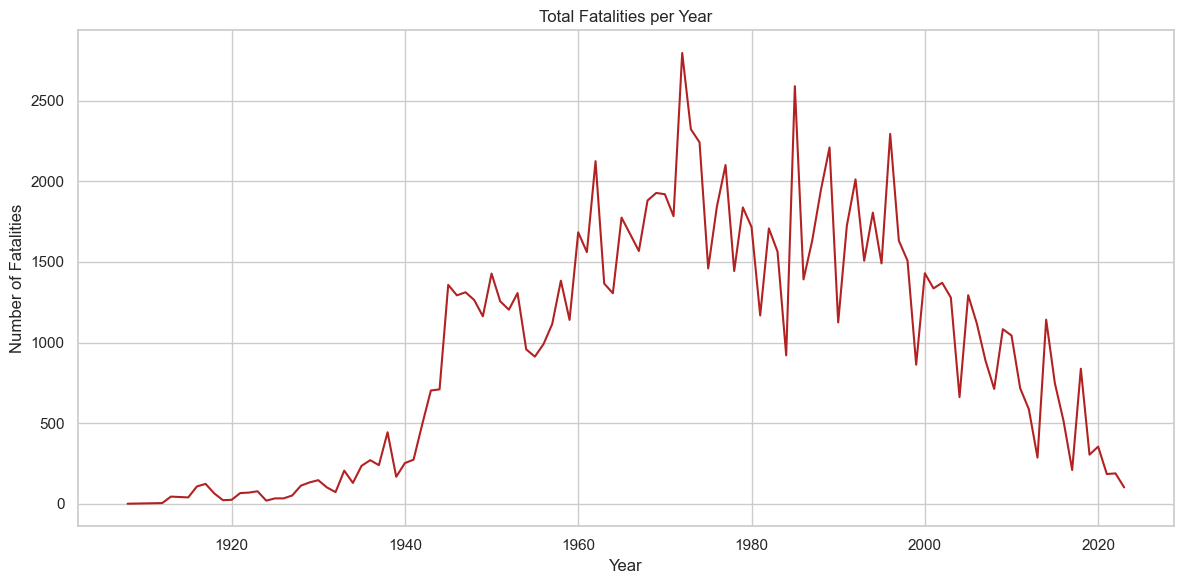

In [7]:
# Total fatalities by year
fatalities_by_year = df.groupby("Year")["fatalities"].sum()

print("Sample fatalities by year:")
print(fatalities_by_year.head())

# Plot fatalities by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=fatalities_by_year.index, y=fatalities_by_year.values, color="firebrick")
plt.title("Total Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()


Total fatalities rose sharply in the 1950s–1970s, peaking in the 1970s with nearly 20,000 deaths. After that, fatalities steadily decline. The 2020s so far show only 831, again possibly reflecting both improved safety and lower data completeness. The trend mirrors the crash count — fewer incidents, fewer fatalities.



4.  What’s the deadliest crash in the dataset?

In [8]:
deadliest_crash = df[df["fatalities"] == df["fatalities"].max()]
deadliest_crash[[
    "date", "location", "operator", "ac_type", "aboard", "fatalities", "summary"
]]

,date,location,operator,ac_type,aboard,fatalities,summary
2862,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,Both aircraft were diverted to Tenerife becaus...


🔥 **Tenerife, Canary Islands (1977)** – **583 deaths**

| Date       | Location                | Operator                             | Aircraft Type                          | Aboard | Fatalities |
|------------|--------------------------|--------------------------------------|----------------------------------------|--------|------------|
| 1977-03-27 | Tenerife, Canary Islands | Pan Am / KLM                         | Boeing B-747-121 & B-747-206B          | 644    | 583        |

- Two jumbo jets collided on the runway in heavy fog — the deadliest aviation accident in history.
- Caused by a mix of miscommunication, procedural failures, and tragic timing.

5. How often do crashes kill all passengers/crew?

Crashes with all people aboard killed: 3162 out of 4952 (63.85%)


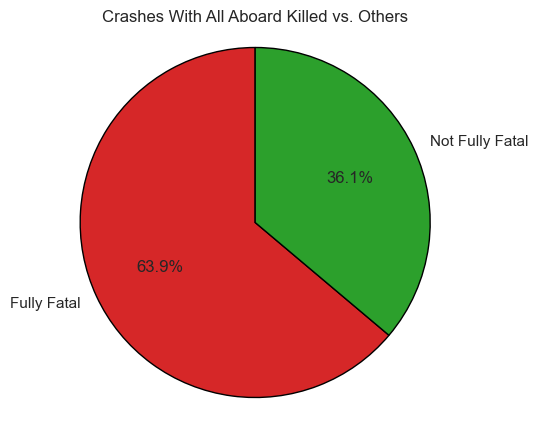

In [9]:
df_nonzero_aboard = df[df["aboard"] > 0]
fully_fatal_crashes = df_nonzero_aboard[df_nonzero_aboard["fatalities"] == df_nonzero_aboard["aboard"]]

# Count and percentage
total_crashes = len(df_nonzero_aboard)
fully_fatal_count = len(fully_fatal_crashes)
fully_fatal_percent = round((fully_fatal_count / total_crashes) * 100, 2)

print(f"Crashes with all people aboard killed: {fully_fatal_count} out of {total_crashes} ({fully_fatal_percent}%)")

# Plot: Survival vs. Fully Fatal crashes
plt.figure(figsize=(6, 5))
labels = ['Fully Fatal', 'Not Fully Fatal']
counts = [fully_fatal_count, total_crashes - fully_fatal_count]
colors = ['#D62728', '#2CA02C']

plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Crashes With All Aboard Killed vs. Others")
plt.axis('equal')
plt.show()

☠️ **3162 of 4952 crashes** (~63.85%) resulted in **total fatalities**.

- Aviation crashes are often not survivable.
- However, ~36.1% of crashes had at least one survivor.


6. Which commercial aircraft types have the highest fatality averages in recent years?

ac_type
Boeing 777-2H6ER     298.0
Airbus A-300-605R    260.0
Boeing 777-200       239.0
Airbus A330-203      228.0
Boeing B-747-209B    225.0
Boeing 737-MAX 8     189.0
Airbus A321-231      188.0
Boeing 737-8KV WL    176.0
AirbusA310-304       169.0
Airbus A-320-216     162.0
Name: fatalities, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_24344\172634487.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fatal_avg.index, y=values, palette="magma")
C:\Users\hp\AppData\Local\Temp\ipykernel_24344\172634487.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=30, ha='right')


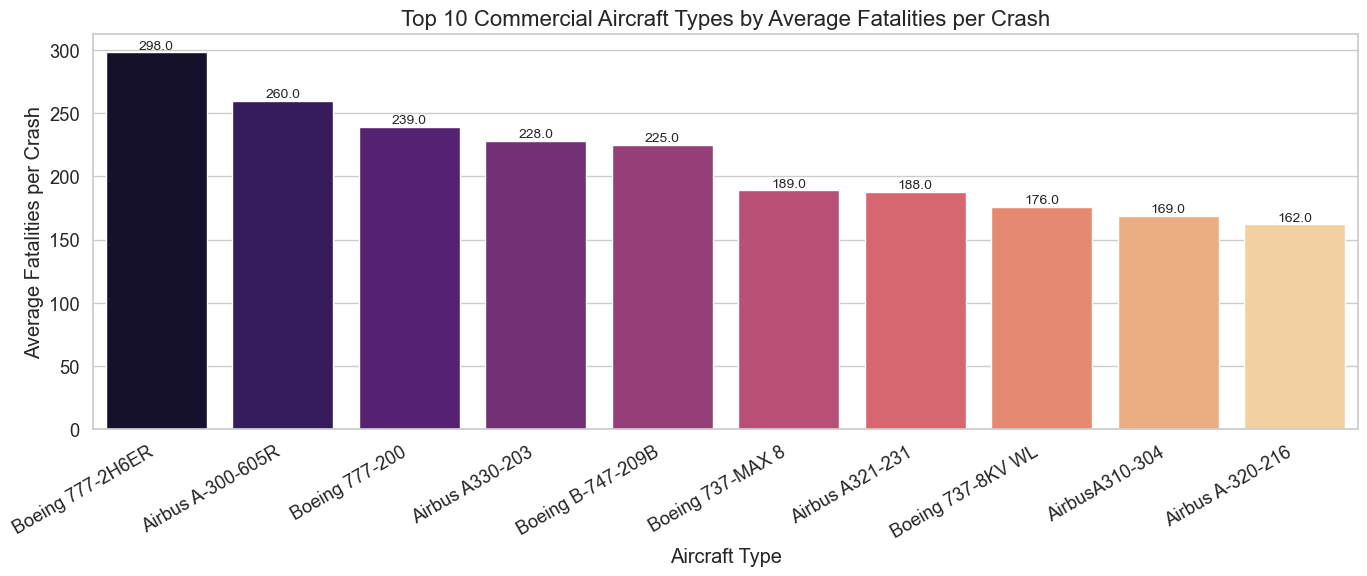

In [14]:
recent_df = df[df['Year'] >= 2000]  # Filter crashes from 2000 onwards
#  "commercial" excludes military 
commercial_df = recent_df[
    ~recent_df['operator'].str.contains('Military|Private|Mail', case=False, na=False)
]

# Group by aircraft type and calculate average fatalities
fatal_avg = (
    commercial_df.groupby('ac_type')['fatalities']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(fatal_avg)


# Shorten labels for better display
def shorten(name):
    return name if len(name) <= 25 else name[:22] + '...'

# Prepare data for plotting
labels = [shorten(name) for name in fatal_avg.index]
values = fatal_avg.values

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(x=fatal_avg.index, y=values, palette="magma")

# Title and labels
ax.set_title('Top 10 Commercial Aircraft Types by Average Fatalities per Crash', fontsize=16)
ax.set_ylabel('Average Fatalities per Crash')
ax.set_xlabel('Aircraft Type')
ax.set_xticklabels(labels, rotation=30, ha='right')

# Annotate bar values
for i, val in enumerate(values):
    ax.text(i, val + 0.3, f"{val:.1f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Modern jets like the **Boeing 777**, **Airbus A300**, and **Boeing 737 MAX 8** top the list for highest average fatalities per crash. These incidents, although rare, tend to be catastrophic due to higher onboard capacity.

7. How many crashes involve military vs. civilian operators?

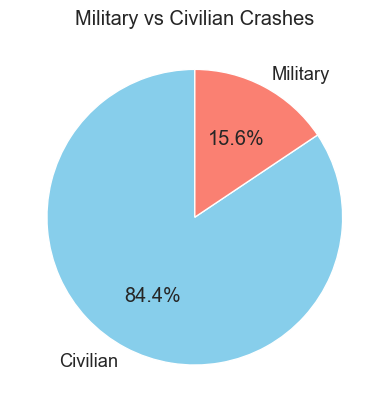

In [15]:
df["is_military"] = df["operator"].str.contains("military|navy|air force|army", case=False, na=False)
df["is_military"].value_counts()

df["is_military"].value_counts().plot.pie(
    labels=["Civilian", "Military"],
    autopct="%1.1f%%",
    colors=["skyblue", "salmon"],
    startangle=90
)
plt.title("Military vs Civilian Crashes")
plt.ylabel("")
plt.show()

- **Civilian crashes**: 4196
- **Military crashes**: 776

Military flights make up about **15.6%** of crashes. These include war-time flights, test flights, and training missions.

8. Top 15 countries with most aircraft crashes since 2000

C:\Users\hp\AppData\Local\Temp\ipykernel_24344\684515003.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="rocket")


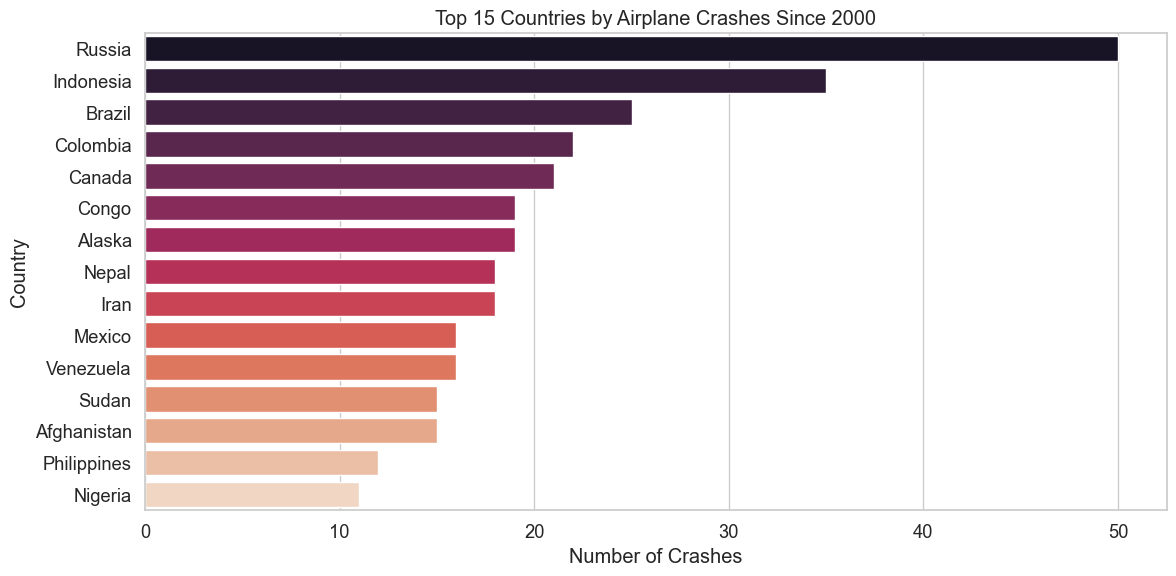

In [18]:
# If most entries end with country or state info, split location by comma and keep the last part
df['location_cleaned'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1].strip() if ',' in x else x)

# View unique cleaned locations (used for country approximation)
df['location_cleaned'].value_counts().head(20)

df_2000 = df[df['Year'] >= 2000]

top_countries = df_2000['location_cleaned'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="rocket")
plt.title("Top 15 Countries by Airplane Crashes Since 2000")
plt.xlabel("Number of Crashes")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

- **Russia** has the highest number of aircraft crashes since 2000.
- Other top countries include **Indonesia**, **Brazil**, **Colombia**, and **Canada**.
- These countries typically have expansive airspaces, challenging terrains, or developing aviation infrastructures.

9. word cloud of most frequent words in Summary

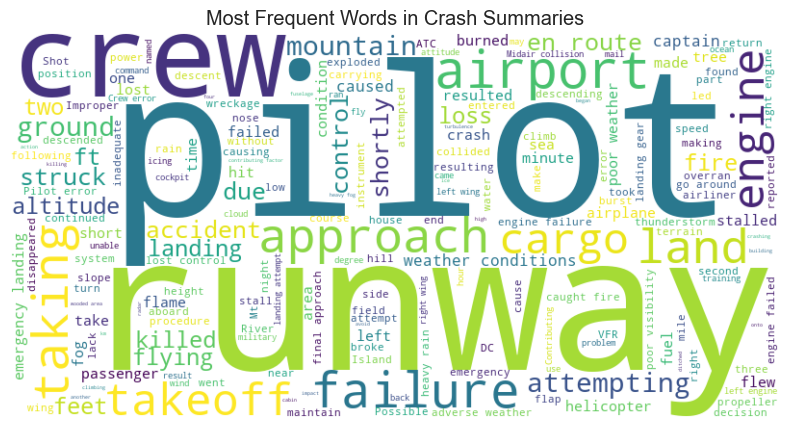

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all summary text
text = " ".join(str(s) for s in df['summary'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['aircraft', 'plane', 'flight', 'air', 'crashed'])  # Add more domain-specific stopwords if needed

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Crash Summaries')
plt.show()

The most prominent keywords in crash summaries include **pilot**, **crew**, **runway**, **failure**, **engine**, **airport**, **control**, and **approach**. Terms like **mountain**, **altitude**, **takeoff**, **fire**, and **crashed** also appear frequently, reflecting recurring themes of mechanical failure, human error, and environmental challenges. This word cloud highlights the common language used to describe aviation incidents.

10.  What are the most commonly mentioned causes of airplane crashes based on keyword tagging?

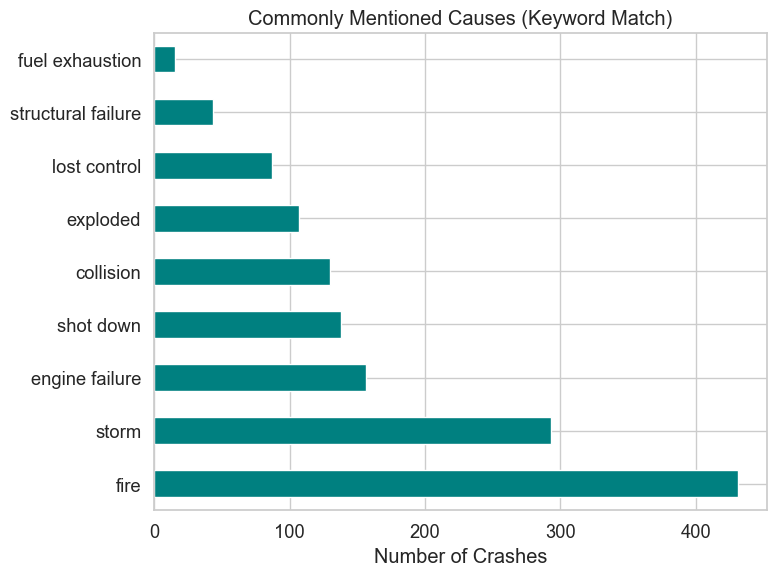

In [20]:
# Same keyword list
cause_keywords = ['fire', 'engine failure', 'shot down', 'lost control', 'collision', 'storm', 'fuel exhaustion', 'exploded', 'structural failure']

# Create column flags for each cause
for cause in cause_keywords:
    df[cause] = df['summary'].str.lower().str.contains(cause, na=False)

# Sum to see most common
cause_counts = df[cause_keywords].sum().sort_values(ascending=False)

# Plot
cause_counts.plot(kind='barh', figsize=(8, 6), title='Commonly Mentioned Causes (Keyword Match)', color='teal')
plt.xlabel('Number of Crashes')
plt.tight_layout()
plt.show()


Using keyword matching, the most cited causes in crash summaries include **fire**, **storm**, and **engine failure**. These are followed by incidents involving being **shot down**, **collision**, and **explosions**. Less frequent but notable causes include **lost control**, **structural failure**, and **fuel exhaustion**. This categorization highlights how both mechanical failures and external threats contribute significantly to aviation accidents.

11. What keywords dominate crash summaries during the World War I and II periods compared to the Cold War and post-Cold War eras?


Top keywords for World War I:
shot: 9
down: 9
british: 9
aircraft: 9
crashed: 8
sea: 5
fire: 4
being: 3
attempting: 2
land: 2

Top keywords for World War II:
crashed: 168
aircraft: 117
plane: 80
off: 42
landing: 42
mountain: 39
engine: 39
pilot: 38
down: 34
attempting: 33

Top keywords for Cold War:
crashed: 1794
aircraft: 1481
plane: 968
approach: 620
crew: 594
flight: 581
engine: 562
off: 561
runway: 552
pilot: 487

Top keywords for Post-Cold War:
crashed: 955
plane: 925
aircraft: 709
runway: 443
off: 431
flight: 414
crew: 384
airport: 372
pilot: 322
engine: 301


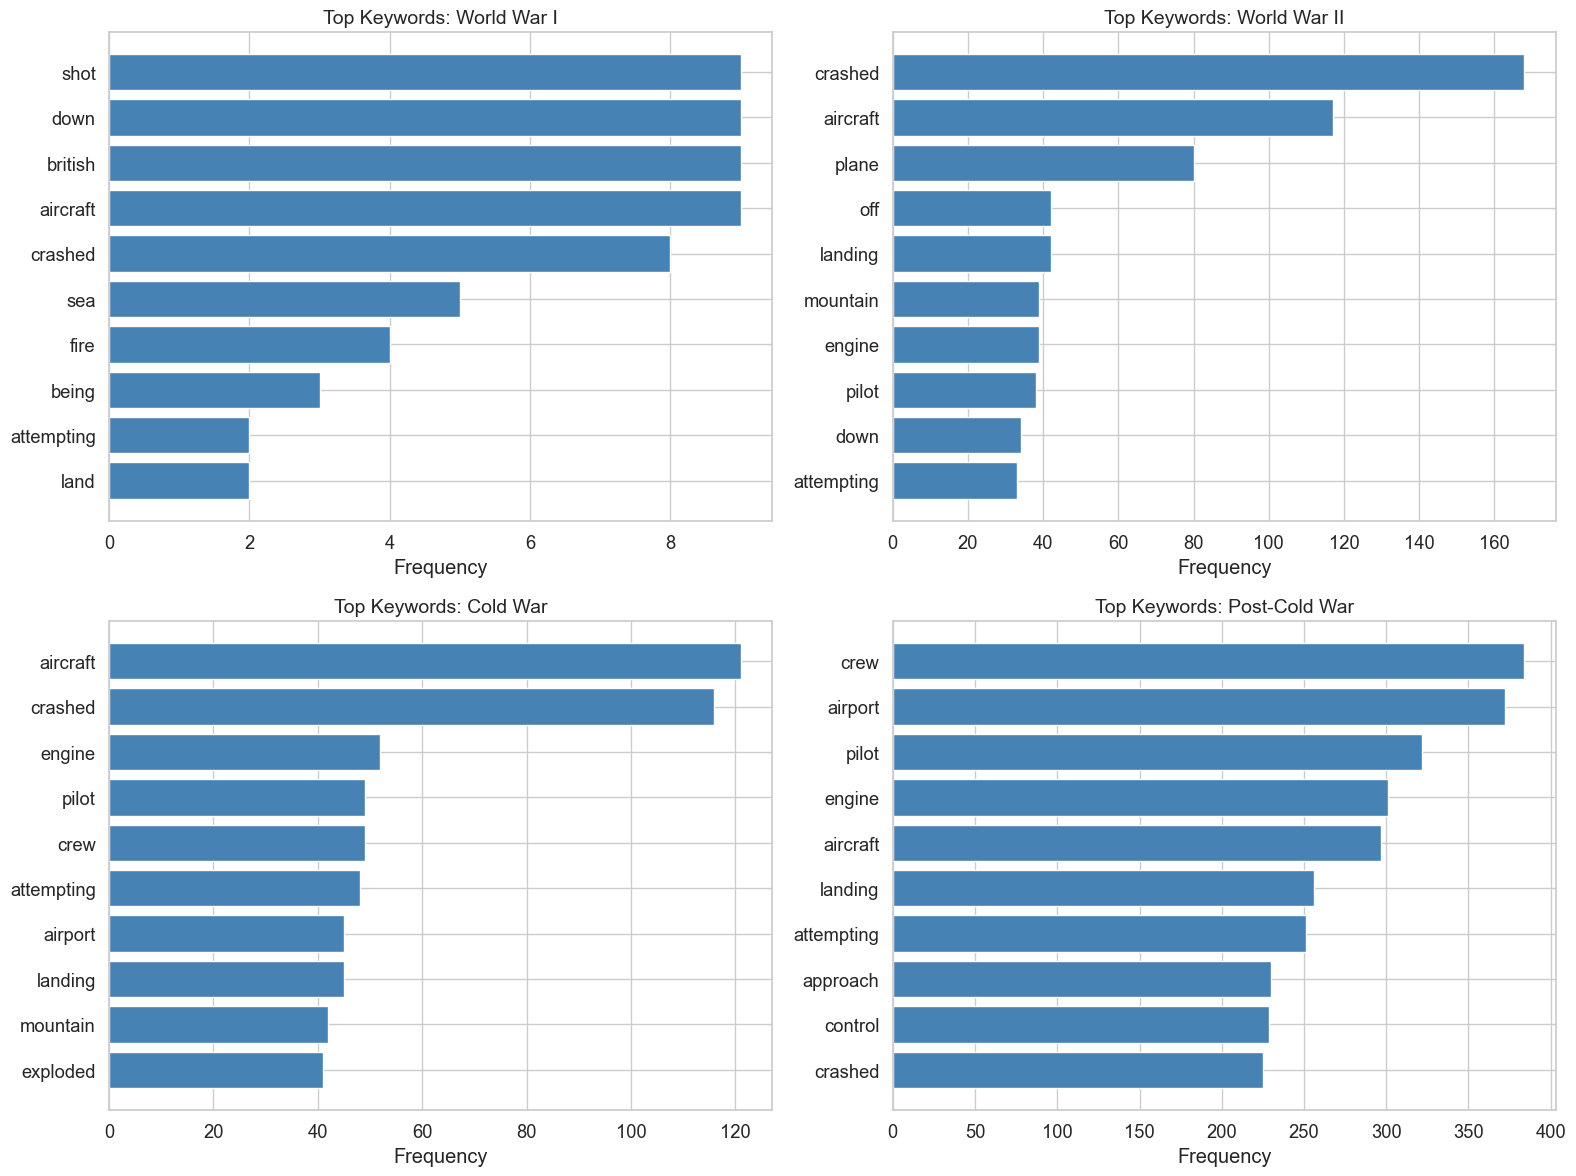

In [21]:
import pandas as pd
from collections import Counter
import re

# Sample DataFrame name assumed: df
# Ensure 'Year' and 'summary' columns exist

# Define conflict eras
def assign_era(year):
    if 1914 <= year <= 1918:
        return "World War I"
    elif 1939 <= year <= 1945:
        return "World War II"
    elif 1947 <= year <= 1991:
        return "Cold War"
    elif year > 1991:
        return "Post-Cold War"
    else:
        return "Other"

df['Era'] = df['Year'].apply(assign_era)

# Basic text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-letters
    return text

# Function to get top keywords for an era
def get_top_keywords(df, era, n=15, stopwords=None):
    summaries = df[df['Era'] == era]['summary'].dropna().apply(clean_text)
    words = " ".join(summaries).split()
    if stopwords:
        words = [w for w in words if w not in stopwords]
    return Counter(words).most_common(n)

# Define basic stopwords (you can use nltk.corpus.stopwords if needed)
basic_stopwords = {'the', 'and', 'of', 'in', 'to', 'a', 'was', 'by', 'at', 'on', 'with', 
                   'as', 'from', 'an', 'after', 'into', 'during', 'when', 'for', 'this', 
                   'that', 'were', 'it', 'while', 'about'}

# Get top keywords for each era
eras = ['World War I', 'World War II', 'Cold War', 'Post-Cold War']
keywords_by_era = {}

for era in eras:
    keywords_by_era[era] = get_top_keywords(df, era, n=10, stopwords=basic_stopwords)

# Display results
for era, keywords in keywords_by_era.items():
    print(f"\nTop keywords for {era}:")
    for word, count in keywords:
        print(f"{word}: {count}")


# Re-run the keyword extraction and plot the actual provided keywords
import matplotlib.pyplot as plt

# Manually input the extracted keywords for each era (top 10 per era for demonstration)
era_keywords = {
    'World War I': {
        'shot': 9, 'down': 9, 'british': 9, 'aircraft': 9, 'crashed': 8,
        'sea': 5, 'fire': 4, 'being': 3, 'attempting': 2, 'land': 2
    },
    'World War II': {
        'crashed': 168, 'aircraft': 117, 'plane': 80, 'off': 42, 'landing': 42,
        'mountain': 39, 'engine': 39, 'pilot': 38, 'down': 34, 'attempting': 33
    },
    'Cold War': {
        'aircraft': 121, 'crashed': 116, 'engine': 52, 'pilot': 49, 'crew': 49,
        'attempting': 48, 'airport': 45, 'landing': 45, 'mountain': 42, 'exploded': 41
    },
    'Post-Cold War': {
        'crew': 384, 'airport': 372, 'pilot': 322, 'engine': 301, 'aircraft': 297,
        'landing': 256, 'attempting': 251, 'approach': 230, 'control': 229, 'crashed': 225
    }
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, (era, words_dict) in enumerate(era_keywords.items()):
    words, counts = zip(*words_dict.items())
    axs[i].barh(words, counts, color='steelblue')
    axs[i].set_title(f'Top Keywords: {era}', fontsize=14)
    axs[i].invert_yaxis()
    axs[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

### Keyword Trends Across Major Conflict Eras

Crash summaries reflect shifts in language and focus over time:

- **World War I**: Keywords like *shot*, *down*, *British*, and *aircraft* suggest combat-related incidents and military aviation.
- **World War II**: Terms such as *crashed*, *aircraft*, *pilot*, and *engine* reflect both the scale and technological aspects of the war.
- **Cold War Era**: A more operational vocabulary emerges, including *approach*, *crew*, *runway*, and *flight*, indicating structured aviation activity with a mix of civilian and military operations.
- **Post-Cold War Era**: Civilian aviation terms dominate, with keywords like *airport*, *runway*, *flight*, and *pilot* pointing to commercial air travel and modern aviation challenges.

These evolving keyword patterns reveal the broader context of aviation history—shifting from combat-heavy narratives to commercial and operational concerns.

## 🧠 Conclusion

The aviation industry has evolved through both triumphs and tragedies. From mechanical failures and hostile attacks to human error and infrastructure limitations, crash causes are multifaceted. However, the steady **reduction in crashes**, **improved cause identification**, and **modern aircraft safety** suggest that aviation has become far safer.

Yet, challenges persist—particularly in regions with limited infrastructure or operational transparency. This project emphasizes the importance of consistent data reporting, technological upgrades, and global safety standards.

---

## ⚠️ Limitations

- **Textual summaries** vary in length, detail, and consistency across decades.
- **Location parsing** relies on comma-based patterns and may not accurately reflect countries in all cases.
- **Some early records** may underreport minor crashes or non-fatal incidents.
- The **dataset lacks weather, maintenance logs, black box data**, or ATC records that could improve cause attribution.

---

## 📁 Repository & References

- 📂 Dataset used: [Kaggle – Airplane Crashes and Fatalities](https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023)

---

> *“Aviation is proof that given the will, we have the capacity to achieve the impossible.”*  
> — Eddie Rickenbacker
